### Importing Modules

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sklearn.datasets as skl_data
from PIL import Image

from sklearn.neural_network import MLPClassifier 

## Processing Images

### Function for Converting Train Dataset JPGs into Pixel Data

Each image is 208x176 pixels and the number of files for each category in the train and test dataset are below. Therefore, there will be 36608 pixels of data. There are 5121 jpg files total in the train dataset. 

I will use these facts to initialize a 2 dimensional array (5121 x 36608)

In [31]:
def JPG2Pixel_Training_Data(directory):
    train_complete_array = np.zeros((5121,36608))
    i = 0
    for root, dirs, files in os.walk(directory):
        for filename in files:
            if filename.endswith('.jpg'):
                train_file_path = os.path.join(root, filename)
                train_pixelated_image = Image.open(train_file_path)
                train_numpy_array = np.asarray(train_pixelated_image)
                train_reshaped_image = train_numpy_array.reshape(1, -1)
                train_complete_array[i] = train_reshaped_image
                i += 1
    return train_complete_array

In [32]:
Train_Dataset = "/Users/bigyambat/Desktop/TRGN_ML/Alzheimer_Dataset/train"


In [33]:
final_train_array = JPG2Pixel_Training_Data(Train_Dataset)

In [34]:
np.shape(final_train_array)

(5121, 36608)

### Function for Converting Test Datset JPG into Pixel Data

Each image is 208x176 pixels and the number of files for each category in the train and test dataset are below. Therefore, there will be 36608 pixels of data. There are 1279 jpg files in the test dataset.

I will use these facts to initialize a 2 dimensional array (1279 x 36608)

In [35]:
def JPG2Pixel_Test_Data(directory):
    test_complete_array = np.zeros([1279,36608])
    i = 0
    for root, dirs, files in os.walk(directory):
        for filename in files:
            if filename.endswith('.jpg'):
                test_file_path = os.path.join(root, filename)
                test_pixelated_image = Image.open(test_file_path)
                test_numpy_array = np.asarray(test_pixelated_image)
                test_reshaped_image = test_numpy_array.reshape(1, -1)
                test_complete_array[i] = test_reshaped_image
                i += 1
    return test_complete_array

In [36]:
Test_Dataset = "/Users/bigyambat/Desktop/TRGN_ML/Alzheimer_Dataset/test"

In [37]:
final_test_array = JPG2Pixel_Test_Data(Test_Dataset)

In [38]:
np.shape(final_test_array)

(1279, 36608)

## Data Wrangling

### Creating Dataframe for Train Dataset

In [39]:
train_df = pd.DataFrame(final_train_array)

In [40]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,36598,36599,36600,36601,36602,36603,36604,36605,36606,36607
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
train_df.max(axis='columns')

0       255.0
1       255.0
2       255.0
3       255.0
4       255.0
        ...  
5116    252.0
5117    255.0
5118    255.0
5119    255.0
5120    255.0
Length: 5121, dtype: float64

In [42]:
train_df.max(axis='columns').max()

255.0

Based on the value above, the train dataset has a maximum pixel value of 255. 

### Creating Dataframe for Test Dataset

In [43]:
test_df = pd.DataFrame(final_test_array)

In [44]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,36598,36599,36600,36601,36602,36603,36604,36605,36606,36607
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
test_df.max(axis ='columns')

0       252.0
1       255.0
2       255.0
3       255.0
4       255.0
        ...  
1274    253.0
1275    251.0
1276    254.0
1277    255.0
1278    248.0
Length: 1279, dtype: float64

In [46]:
test_df.max(axis ='columns').max()

255.0

Based on the value above, the test dataset has a maximum pixel value of 255. 

### Adding Labels to Data

The JPG2Pixel functions above iterated through the test and the train class folders in the following order

1. Very Mild Demebted
2. Moderate Demented
3. Mild Demented
4. Non Demented

Based on these classes (and the number of files for each class), I am able to deduce the labels for each row of the train_df and test_df

### Train Dataframe

In [47]:
train_df['Labels']= 'Classes'

In [48]:
train_df.loc[0:1791,'Labels'] = 'Very Mild Demented'
train_df.loc[1791:1843,'Labels'] = 'Moderate Demented'
train_df.loc[1843:2560,'Labels'] = 'Mild Demented'
train_df.loc[2560:5120,'Labels'] = 'Non Demented'


In [49]:
train_df

,0,1,2,3,4,5,6,7,8,9,...,36599,36600,36601,36602,36603,36604,36605,36606,36607,Labels
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non Demented
5117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non Demented
5118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non Demented
5119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non Demented


### Test Dataframe

In [50]:
test_df['Labels']= 'Classes'

In [51]:
test_df.loc[0:447,'Labels'] = 'Very Mild Demented'
test_df.loc[447:459,'Labels'] = 'Moderate Demented'
test_df.loc[459:638,'Labels'] = 'Mild Demented'
test_df.loc[638:1278,'Labels'] = 'Non Demented'

In [52]:
test_df

,0,1,2,3,4,5,6,7,8,9,...,36599,36600,36601,36602,36603,36604,36605,36606,36607,Labels
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non Demented
1275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non Demented
1276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non Demented
1277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non Demented


### Visualizing the Data

<function matplotlib.pyplot.show(close=None, block=None)>

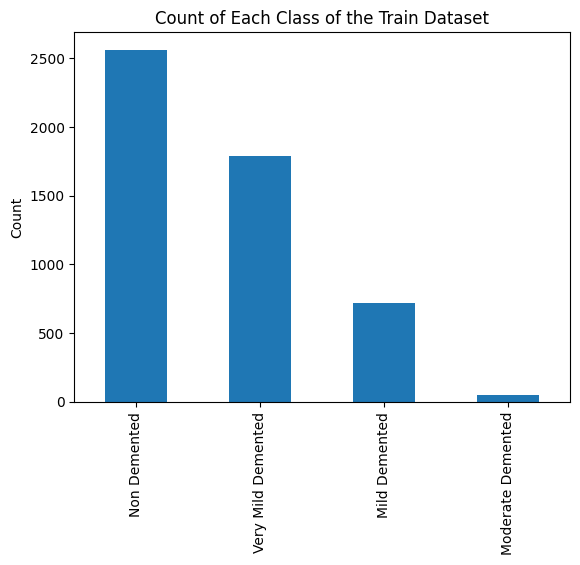

In [53]:
train_df['Labels'].value_counts().plot(kind='bar', ylabel = "Count", title="Count of Each Class of the Train Dataset")

plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

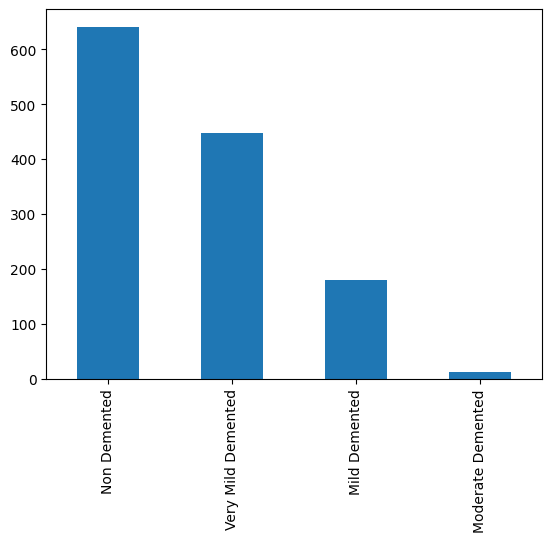

In [54]:
test_df['Labels'].value_counts().plot(kind='bar')
plt.show

From the figures above, its clear that both the train and test dataset are imbalanced. The moderate demented class in particular contains drastically lower samples than the other classes in the dataset. This is a common issue called imbalanced classification. Therefore, I will need to perform random oversampling to compensate for this. However, since the moderate demented class has an order of magintude lower data, oversampling this class might induce problems in the machine learning model. In general, oversampling can lead to overfitting issues in the ML model. Therefore, I will be removing the Moderate Demented class from both the training and test datasets. The model will be trained for the following 3 classes: Non Demented, Very Mild Demented, and Mild Demented. I will be oversampling the Very Mild Demented and Mild Demented classes to balance both the train and test dataset. 

In [55]:
train_df.drop(train_df[train_df["Labels"] == 'Moderate Demented'].index, inplace=True)
train_df.Labels.unique()
train_df

,0,1,2,3,4,5,6,7,8,9,...,36599,36600,36601,36602,36603,36604,36605,36606,36607,Labels
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non Demented
5117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non Demented
5118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non Demented
5119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non Demented


In [56]:
test_df.drop(test_df[test_df["Labels"] == 'Moderate Demented'].index, inplace=True)
test_df.Labels.unique()
test_df

,0,1,2,3,4,5,6,7,8,9,...,36599,36600,36601,36602,36603,36604,36605,36606,36607,Labels
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Very Mild Demented
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non Demented
1275,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non Demented
1276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non Demented
1277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Non Demented


Now, there are 5069 samples for the train dataset and 1267 samples for the test dataset

### Normalization

Before oversampling the data, the train and test datasets should be normalized. ML models that are based on pixel data especially is tend to be sensitive to feature scaling. Normally, any scaling method like (StandardScaler from sklearn.preprocessing) would be sufficient. However, due to the structure of the data, a simpler method can be used to scale the data. Based on the Creating Dataframe Section, the maximum pixel value both the train and test dataset is 255. So dividing all values of the dataset by 255, will normalize the data. Using this method, values will range from 0-1 for each pixel. 

In [57]:
train_df.loc[:, 0:36607] = train_df.loc[:, 0:36607] / 255
train_df.max(axis ='columns')

/var/folders/gd/2x012bcn7c3cyfr5829j_dkm0000gn/T/ipykernel_3341/2489170132.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_df.max(axis ='columns')


0       1.000000
1       1.000000
2       1.000000
3       1.000000
4       1.000000
          ...   
5116    0.988235
5117    1.000000
5118    1.000000
5119    1.000000
5120    1.000000
Length: 5069, dtype: float64

In [58]:
test_df.loc[:, 0:36607] = test_df.loc[:, 0:36607] / 255
test_df.max(axis ='columns')

/var/folders/gd/2x012bcn7c3cyfr5829j_dkm0000gn/T/ipykernel_3341/1919608565.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  test_df.max(axis ='columns')


0       0.988235
1       1.000000
2       1.000000
3       1.000000
4       1.000000
          ...   
1274    0.992157
1275    0.984314
1276    0.996078
1277    1.000000
1278    0.972549
Length: 1267, dtype: float64

## Model Selection

As mentioned, I will be using scikit-learn modules for machine learning. From here onwards, these modules will be used to oversample, initialize, run quality checks, and optimize the model. Before doing this, I will be defining variables for the model. Historically, X is the features and Y is the labels. I will do this for both the train and test datasets. The data must be formatted this in this manner to use scikit-learn modules. You also want to split the dataset before running any oversampling techniques (otherwise there will be repeat data in the test and train datasets)

In [59]:
X_Train = train_df.drop(columns="Labels")
Y_Train = train_df.Labels

In [60]:
X_Train

,0,1,2,3,4,5,6,7,8,9,...,36598,36599,36600,36601,36602,36603,36604,36605,36606,36607
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
Y_Train

0       Very Mild Demented
1       Very Mild Demented
2       Very Mild Demented
3       Very Mild Demented
4       Very Mild Demented
               ...        
5116          Non Demented
5117          Non Demented
5118          Non Demented
5119          Non Demented
5120          Non Demented
Name: Labels, Length: 5069, dtype: object

In [62]:
X_Test = train_df.drop(columns="Labels")
Y_Test = train_df.Labels

In [63]:
X_Test

,0,1,2,3,4,5,6,7,8,9,...,36598,36599,36600,36601,36602,36603,36604,36605,36606,36607
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5118,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5119,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
Y_Test

0       Very Mild Demented
1       Very Mild Demented
2       Very Mild Demented
3       Very Mild Demented
4       Very Mild Demented
               ...        
5116          Non Demented
5117          Non Demented
5118          Non Demented
5119          Non Demented
5120          Non Demented
Name: Labels, Length: 5069, dtype: object

### Synthetic Minority Oversampling Technique

Random Oversampling is often used to correct for an imbalanced dataset. Generally, Random Oversampling is performed on the training dataset only. I will be using Random Oversampling, which duplicates examples from the minority classes. Random samples from the minority class are added (with replacement) to the train dataset. This process is repeated until the dataset classes are equal. In our case, there are now 3 classes for the dataset (refer to previous section). Oversampling will still work even with multi-class classiciation (where there is more than 1 minority group). 

I will be using the imblearn Library which to do random oversampling. Use the command below to install using pip

In [65]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [66]:
from imblearn.over_sampling import RandomOverSampler


In [67]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_Over, Y_Over = oversample.fit_resample(X_Train, Y_Train)


In [68]:
print(len(Y_Train))
print(len(Y_Over))

5069
6913


<AxesSubplot: >

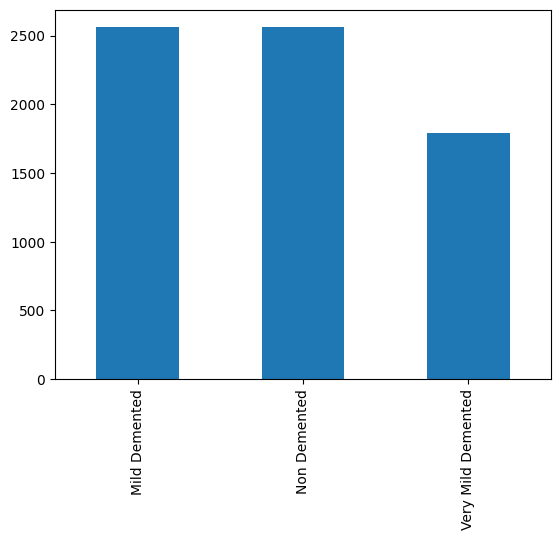

In [69]:
Y_Over_df = pd.DataFrame(Y_Over)

Y_Over_df['Labels'].value_counts().plot(kind='bar')

Since there are 3 classes, we will need to oversample again to make all the classes equal

In [70]:
X_Over, Y_Over = oversample.fit_resample(X_Over, Y_Over)

<AxesSubplot: >

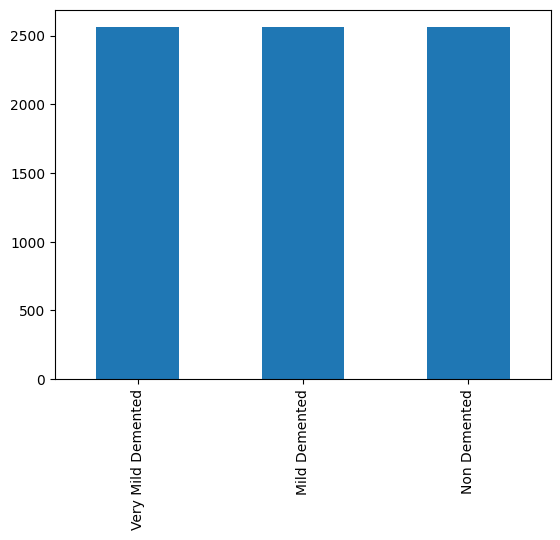

In [71]:
Y_Over_df = pd.DataFrame(Y_Over)
Y_Over_df['Labels'].value_counts().plot(kind='bar')

Now that the dataset is balanced. Lets rename the X_Over and Y_Over to X_Train and Y_Train

In [72]:
X_Train = X_Over
Y_Train = Y_Over

### Initializing the Classification Model

For the classification model, I will be using an MLP based models (Multi-Layer Preceptrons) from Scikit-Learn. Generally, MLPs are a great model for pixels since individual pixel values can be fed directly into the input layer of the MLP model. The Scikit Learn module has the following 2 MLP models with unique featuers: 

1. MLPCLassifier => MLP Model that trains using Backpropogation
2. MLPRegressor => MLP Model that trains using Backpropogation without an acitvation function in the output layer. 

In [79]:
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(100, 100), random_state=1)

In [80]:
clf.fit(X_Train, Y_Train)

/opt/homebrew/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(100, 100), random_state=1,
              solver='lbfgs')